In [24]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [25]:
train_data=datasets.MNIST(
    root='data',
    train=True,
    transform=ToTensor(),
    download=True
)

test_data=datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor(),
    download=True
)

In [26]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [27]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [28]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [29]:
train_data.targets.size()

torch.Size([60000])

In [30]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [31]:
from torch.utils.data import DataLoader

loaders={
    'train':DataLoader(train_data,batch_size=100,shuffle=True,num_workers=1),
    'test':DataLoader(test_data,batch_size=100,shuffle=True,num_workers=1),
}

In [32]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x78b3707af760>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x78b3707ac310>}

In [50]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
class CNN(nn.Module):

  def __init__(self):
      super(CNN, self).__init__()

      self.conv1=nn.Conv2d(1,10, kernel_size=5)
      self.conv2=nn.Conv2d(10, 20, kernel_size=5)
      self.conv2_drop=nn.Dropout2d()
      self.fcl=nn.Linear(320,50)
      self.fc2=nn.Linear(50,10)

  def forward(self,x):
      x=F.relu(F.max_pool2d(self.conv1(x),2))
      x=F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
      x=x.view(-1,320)
      x=F.relu(self.fcl(x))
      x=F.dropout(x,training=self.training)
      x=self.fc2(x)

      return F.softmax(x)


In [51]:
import torch

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model=CNN().to(device)

optimizer=optim.Adam(model.parameters(), lr=0.001)

loss_fn=nn.CrossEntropyLoss()

def train (epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(loaders['train']):
      data, target=data.to(device),target.to(device)
      optimizer.zero_grad()
      output=model(data)
      loss=loss_fn(output, target)
      loss.backward()
      optimizer.step()
      if batch_idx % 20==0:
        print(f'Train Epoch: {epoch} [{batch_idx*len(data)}/{len(loaders["train"].dataset)} ({100. *batch_idx/len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')

def test():
    model.eval()
    test_loss=0
    correct=0
    with torch.no_grad():
      for data, target in loaders['test']:
          data, target=data.to(device), target.to(device)
          output=model(data)
          test_loss+=loss_fn(output,target).item()
          pred=output.argmax(dim=1,keepdim=True)
          correct+=pred.eq(target.view_as(pred)).sum().item()
    test_loss/=len(loaders['test'].dataset)
    print(f'\nTest set: Averageloss: {test_loss:.4f}, Accuracy {correct}/{len(loaders["test"].dataset)} ({100. *correct/len(loaders["test"].dataset):.0f}%\n)')


In [52]:
for epoch in range(1,11):
    train(epoch)
    test()

<ipython-input-50-f12eb155408e>:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	2.303010
Train Epoch: 1 [2000/60000 (3%)]	2.289122
Train Epoch: 1 [4000/60000 (7%)]	2.162274
Train Epoch: 1 [6000/60000 (10%)]	1.993135
Train Epoch: 1 [8000/60000 (13%)]	1.860807
Train Epoch: 1 [10000/60000 (17%)]	1.874460
Train Epoch: 1 [12000/60000 (20%)]	1.840283
Train Epoch: 1 [14000/60000 (23%)]	1.833710
Train Epoch: 1 [16000/60000 (27%)]	1.751261
Train Epoch: 1 [18000/60000 (30%)]	1.811383
Train Epoch: 1 [20000/60000 (33%)]	1.786676
Train Epoch: 1 [22000/60000 (37%)]	1.768453
Train Epoch: 1 [24000/60000 (40%)]	1.745931
Train Epoch: 1 [26000/60000 (43%)]	1.687768
Train Epoch: 1 [28000/60000 (47%)]	1.737221
Train Epoch: 1 [30000/60000 (50%)]	1.715371
Train Epoch: 1 [32000/60000 (53%)]	1.685678
Train Epoch: 1 [34000/60000 (57%)]	1.677255
Train Epoch: 1 [36000/60000 (60%)]	1.670336
Train Epoch: 1 [38000/60000 (63%)]	1.735231
Train Epoch: 1 [40000/60000 (67%)]	1.682316
Train Epoch: 1 [42000/60000 (70%)]	1.644792
Train Epoch: 1 [44000/60000 (73%)]	1.677927

In [53]:
device

device(type='cpu')

predict: 7


<ipython-input-50-f12eb155408e>:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


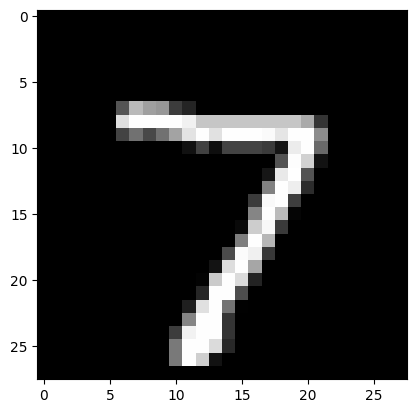

In [57]:
import matplotlib.pyplot as plt
model.eval()
data, target = test_data[0]
data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim=1, keepdim=True).item()
print(f'predict: {prediction}')
image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image, cmap='gray')
plt.show()